# Overview

The objective of this colab is to demonstrate softmax regression in classification task.

> We make use of MNIST dataset for multi-class classification of images into the digits they represent.

# Import

Let's import necessary libraries for data loading, preprocessing, model training, selection and evaluation. 

In addition, we also import basic python libraries for data handling and plotting.

We set the random seed to 42.

In [ ]:
# Common imports
import numpy as np
from pprint import pprint

# to make this notebook's output stable across runs
np.random.seed(42)

#sklearn specific imports
# Dataset fetching 
from sklearn.datasets import fetch_openml

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Pipeline utility
from sklearn.pipeline import Pipeline

# Classifiers: logistic regression (LogisticRegression)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure',figsize=(8,6))

# Data loading

Let's load the MNIST dataset for handwritten digit recognition from OpenML.



In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

We receive feature matrix and label vector after fetching the data.

## Training-test split

Just like earlier MNIST explorations, we use first 60000 examples for training and the remaining 10000 examples for test.

In [ ]:
X = X.to_numpy()
y = y.to_numpy()
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Model building

We scale the input features with `StandardScaler` and use `LogisticRegression` estimator with `multi_class` parameter set to `multinomial` and using `sag` solver.

In [ ]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('logreg', LogisticRegression(multi_class='multinomial',
                                                     solver='sag'))])
pipe.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

After training the model with the training feature matrix and labels, we learn model parameters.

In [ ]:
pipe[-1].coef_.shape

(10, 784)

In [ ]:
pipe[-1].intercept_.shape

(10,)

In [ ]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

# Model evaluation

Let's get a classification report on the test set and also display the confusion matrix.

In [ ]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Most of the classes have f1_score greater than 90%, which is considered to be a good f1-score.

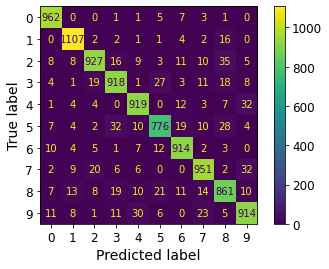

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.show()

# Using `LogisticRegressionCV`

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

scorer = make_scorer(f1_score, average='micro')
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('logreg', LogisticRegressionCV(
                           cv=2, multi_class='multinomial', solver='sag',
                           scoring=scorer, max_iter=100,
                           random_state=1729)
                       )])
pipe.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegressionCV(cv=2, multi_class='multinomial',
                                      random_state=1729,
                                      scoring=make_scorer(f1_score, average=micro),
                                      solver='sag'))])

In [ ]:
pipe[-1].C_

array([2.7825594, 2.7825594, 2.7825594, 2.7825594, 2.7825594, 2.7825594,
       2.7825594, 2.7825594, 2.7825594, 2.7825594])

In [ ]:
pipe[-1].l1_ratio_

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

In [ ]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.93     10000
weighted avg       0.93      0.93      0.93     10000



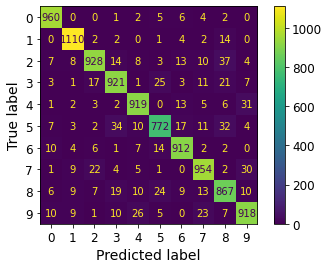

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.show()